In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def prepare(path):
    size = 250
    img_array = cv2.imread(path , cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array , (size,size))
    return img_array.reshape(-1 , size , size , 1)
    

In [3]:
labels = ["drowsiness" , "undrowsiness"]
model = tf.keras.models.load_model('trained_CNN_18oct.h5')

undrowsiness


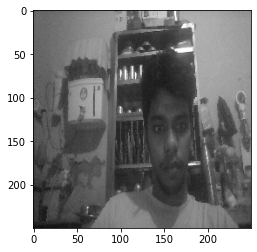

In [4]:
pre = model.predict([prepare("d.jpg")])
print(labels[int(pre[0][0])])
img_array = cv2.imread('d.jpg' , cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array , (250,250))
plt.imshow(img_array , cmap = "gray")
plt.show()


undrowsiness


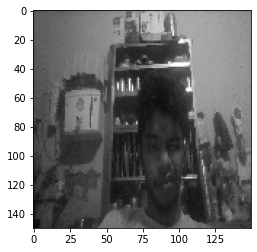

In [5]:
pre = model.predict([prepare("1.jpg")])
print(labels[int(pre[0][0])])
img_array = cv2.imread('1.jpg' , cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array , (150,150))
plt.imshow(img_array , cmap = "gray")
plt.show()

undrowsiness


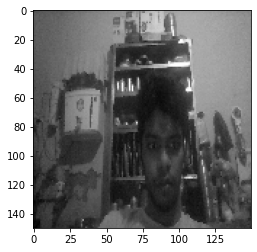

In [6]:
pre = model.predict([prepare("2.jpg")])
print(labels[int(pre[0][0])])
img_array = cv2.imread('2.jpg' , cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array , (150,150))
plt.imshow(img_array , cmap = "gray")
plt.show()

undrowsiness


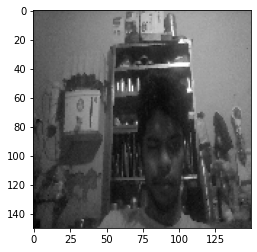

In [7]:
pre = model.predict([prepare("3.jpg")])
print(labels[int(pre[0][0])])
img_array = cv2.imread('3.jpg' , cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array , (150,150))
plt.imshow(img_array , cmap = "gray")
plt.show()

undrowsiness


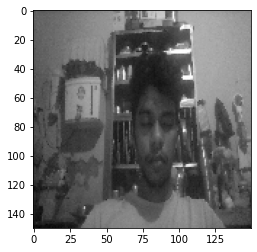

[[1.]]


In [8]:
pre = model.predict([prepare("und.jpg")])
print(labels[int(pre[0][0])])
img_array = cv2.imread('und.jpg' , cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array , (150,150))
plt.imshow(img_array , cmap = "gray")
plt.show()
print(pre)

In [12]:
cap = cv2.VideoCapture(0)
label = "Test"
count = 0
labels = ["drowsiness" , "undrowsiness"]
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    
    gray2 = cv2.resize(gray , (250 , 250))
    pre = model.predict([gray2.reshape(-1 ,250 , 250 , 1)])
#     print(labels[int(pre[0][0])])
#     if labels[int(pre[0][0])]=="drowsiness":
#         print("---")
#         break
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     if count%(24)==0:
    label = labels[int(pre[0][0])]
    cv2.putText(gray,label, (0,420), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,200,152))
    cv2.imshow('frame',gray)
    count+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
